In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import pandas as pd

print(tf.__version__)

2.4.0


In [28]:
dataset_path = "healthcare-dataset-stroke-data.csv"

In [29]:
raw_dataset =  pd.read_csv(dataset_path, nrows=15000,na_values ="?")
dataset =  raw_dataset.copy()
dataset.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [30]:
!echo cleaning the dataset
dataset.isna().sum()
dataset = dataset.dropna()
dataset.tail()

cleaning the dataset


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [31]:
smoking_ststaus = dataset['smoking_status']

In [32]:
smoking_status = dataset.pop('smoking_status')
# {'Unknown', 'formerly smoked', 'never smoked', 'smokes'}

In [33]:
dataset['Unknown'] = (smoking_status == 'Unknown')*1.0
dataset['formerly_smoked'] = (smoking_status == 'formerly smoked')*1.0
dataset['never_smoked'] = (smoking_status == 'never smoked')*1.0
dataset['smokes'] = (smoking_status == 'never smoked')*1.0

In [34]:
dataset.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly_smoked,never_smoked,smokes
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,0,1.0,0.0,0.0,0.0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0,0.0,0.0,1.0,1.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0,0.0,0.0,1.0,1.0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,0,0.0,1.0,0.0,0.0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,0,1.0,0.0,0.0,0.0


In [35]:
!echo re-arrangin the gender
gender = dataset.pop('gender')
dataset['male'] = (gender == 'Male')*1.0
dataset['female'] = (gender == 'Female')*1.0
dataset.tail()

re-arrangin the gender


,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly_smoked,never_smoked,smokes,male,female
5104,14180,13.0,0,0,No,children,Rural,103.08,18.6,0,1.0,0.0,0.0,0.0,0.0,1.0
5106,44873,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0,0.0,0.0,1.0,1.0,0.0,1.0
5107,19723,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0,0.0,0.0,1.0,1.0,0.0,1.0
5108,37544,51.0,0,0,Yes,Private,Rural,166.29,25.6,0,0.0,1.0,0.0,0.0,1.0,0.0
5109,44679,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,0,1.0,0.0,0.0,0.0,0.0,1.0


In [37]:
# Residence_type = dataset['Residence_type']
# {'Rural', 'Urban'}

residence_type = dataset.pop('Residence_type')

dataset['Rural'] = (residence_type == 'Rural')*1.0
dataset['Urban'] = (residence_type == 'Urban')*1.0
dataset.tail()

,id,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,stroke,Unknown,formerly_smoked,never_smoked,smokes,male,female,Rural,Urban
5104,14180,13.0,0,0,No,children,103.08,18.6,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5106,44873,81.0,0,0,Yes,Self-employed,125.20,40.0,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
5107,19723,35.0,0,0,Yes,Self-employed,82.99,30.6,0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
5108,37544,51.0,0,0,Yes,Private,166.29,25.6,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5109,44679,44.0,0,0,Yes,Govt_job,85.28,26.2,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [38]:
# ever_married = dataset['ever_married']
# {'No', 'Yes'}

ever_married = dataset.pop('ever_married')

dataset['Married'] = (ever_married == 'Yes')*1.0
dataset['Unmarried'] = (ever_married == 'No')*1.0
dataset.tail()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,Unknown,formerly_smoked,never_smoked,smokes,male,female,Rural,Urban,Married,Unmarried
5104,14180,13.0,0,0,children,103.08,18.6,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5106,44873,81.0,0,0,Self-employed,125.20,40.0,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
5107,19723,35.0,0,0,Self-employed,82.99,30.6,0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
5108,37544,51.0,0,0,Private,166.29,25.6,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5109,44679,44.0,0,0,Govt_job,85.28,26.2,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [40]:
# work_type = dataset['work_type']
# {'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'}

work_type =  dataset.pop('work_type')

dataset['Govt'] = (work_type == 'Govt_job')*1.0
dataset['Never_worked'] = (work_type == 'Never_worked')*1.0
dataset['Private'] = (work_type == 'Private')*1.0
dataset['self_employed'] = (work_type == 'Self-employed')*1.0
dataset['children'] = (work_type == 'children')*1.0

In [42]:
dataset.pop('id')
dataset.tail()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Unknown,formerly_smoked,never_smoked,smokes,...,female,Rural,Urban,Married,Unmarried,Govt,Never_worked,Private,self_employed,children
5104,13.0,0,0,103.08,18.6,0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5106,81.0,0,0,125.20,40.0,0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5107,35.0,0,0,82.99,30.6,0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5108,51.0,0,0,166.29,25.6,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5109,44.0,0,0,85.28,26.2,0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [43]:
# train and test dataset division for the model

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

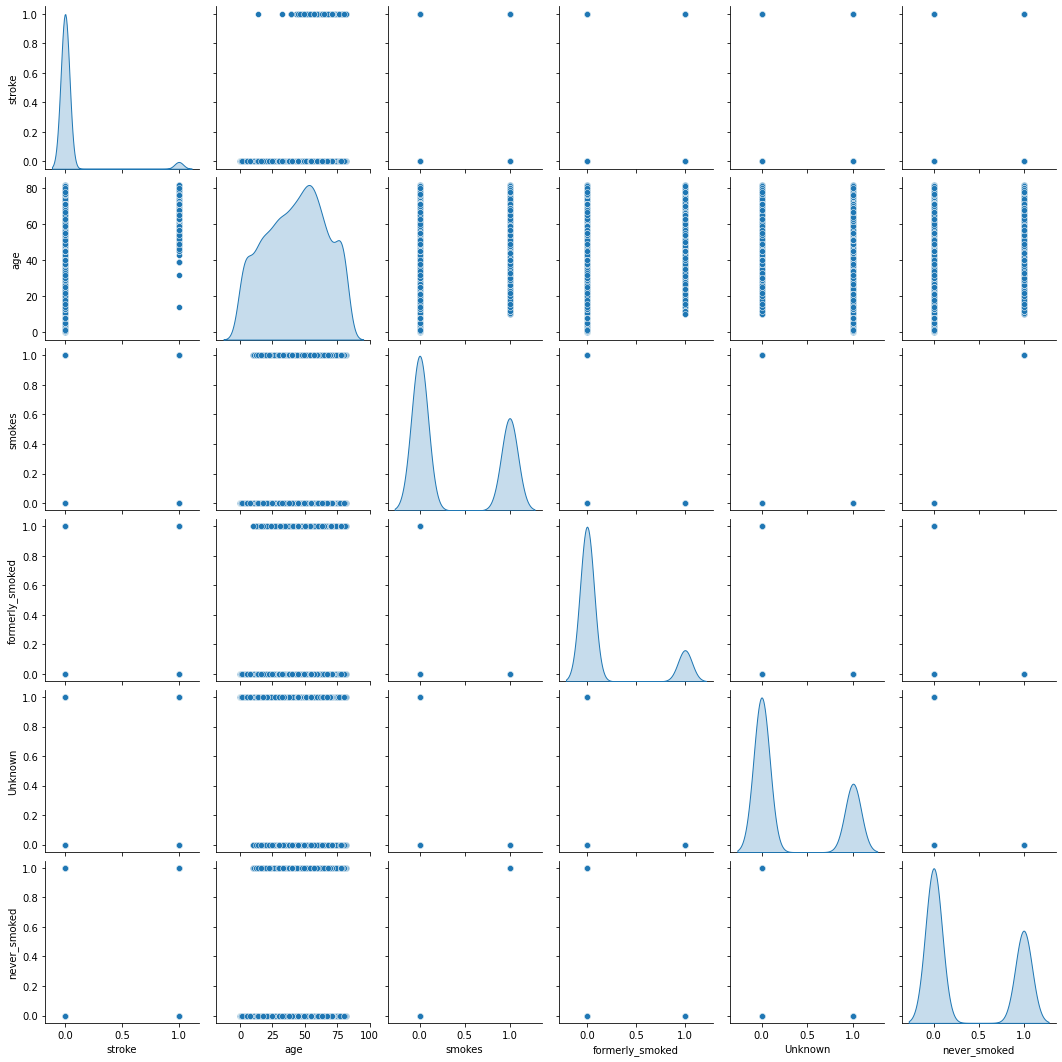

In [44]:
sns.pairplot(train_dataset[['stroke', 'age', 'smokes', 'formerly_smoked', 'Unknown', 'never_smoked' ]], diag_kind="kde")

In [45]:
train_stats = train_dataset.describe()
train_stats.pop('stroke')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
age,3927.0,42.832045,22.614207,0.08,25.00,44.00,60.00,82.00
hypertension,3927.0,0.090400,0.286790,0.00,0.00,0.00,0.00,1.00
heart_disease,3927.0,0.051948,0.221950,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,3927.0,105.294041,44.337724,55.22,77.25,91.85,113.68,271.74
bmi,3927.0,28.925745,7.818725,10.30,23.60,28.10,33.15,97.60
Unknown,3927.0,0.306595,0.461139,0.00,0.00,0.00,1.00,1.00
formerly_smoked,3927.0,0.167303,0.373294,0.00,0.00,0.00,0.00,1.00
never_smoked,3927.0,0.373568,0.483812,0.00,0.00,0.00,1.00,1.00
smokes,3927.0,0.373568,0.483812,0.00,0.00,0.00,1.00,1.00
male,3927.0,0.411255,0.492124,0.00,0.00,0.00,1.00,1.00


In [46]:
train_lable = train_dataset.pop("stroke")
test_lable = test_dataset.pop("stroke")

In [47]:
def normalize(x):
    return (x - train_stats['mean'])/ train_stats['std']
normed_train_data = normalize(train_dataset)
normed_test_data = normalize(test_dataset)

In [49]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape = [len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),]
    
    optimizer = tf.keras.optimizers.Adam(lr=1e-3)
    
    model.compile(loss = keras.losses.BinaryCrossentropy(),
                 optimizer = optimizer,
                 metrics = METRICS)
    return model

In [50]:
model = build_model()

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.predict(normed_train_data[:10])

array([[-0.20366392],
       [-0.07255524],
       [-0.45510104],
       [-0.26398677],
       [-0.79909366],
       [-0.5382789 ],
       [-0.5030855 ],
       [-0.5238293 ],
       [-0.270616  ],
       [-0.9193528 ]], dtype=float32)